In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [22]:
iris = load_iris()

In [23]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Задание 1

In [24]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_target = iris.target # сорт-целевая переменная
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
print(iris.target_names) в
print(data_target) 

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Задание 2

In [26]:
data['target'] = data_target
data2 = data[['sepal length (cm)', 'sepal width (cm)','target']] #фильтруем датафрейм, оставляя нужное 
print(data2.shape)
data2.head()

(150, 3)


,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


Задание 3

Разделяем выборку на тестевую и тренировочную. Оставим 30% на обучение

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data2, data_target, test_size=0.25)

Задание 4

In [28]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [29]:
lda = LinearDiscriminantAnalysis()

In [30]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [31]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([2, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 0,
       1, 2, 1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 0, 0])

In [32]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result.head()

,0,1
0,1,2
1,1,1
2,2,1
3,2,2
4,0,0


In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7894736842105263

Задание 5

In [35]:
lda.coef_

array([[-5.65369725,  7.34684388,  0.        ],
       [ 1.99844126, -3.99318944,  0.        ],
       [ 4.34873039, -4.17502131,  0.        ]])

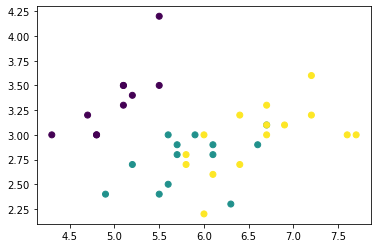

In [36]:
plt.scatter(x = X_test['sepal length (cm)'], y = X_test['sepal width (cm)'], c=y_test)
plt.show()

In [37]:
small_train = X_train[(y_train == 0) | (y_train == 1) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 1) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 1) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 1) | (y_test == 2)]

In [38]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [39]:
lda_small.means_

array([[5.005     , 3.445     ],
       [5.97027027, 2.77837838],
       [6.57714286, 2.97714286]])

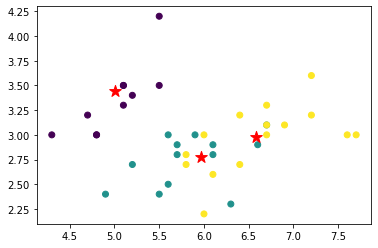

In [40]:
plt.scatter(small_test['sepal length (cm)'], small_test['sepal width (cm)'], c=sy_test)
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

Задание 6

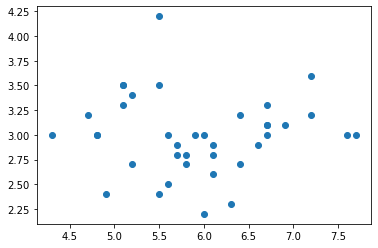

In [41]:
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'])
plt.show()

Задание 7

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [44]:
X_scaled = scaler.fit_transform(X_test)

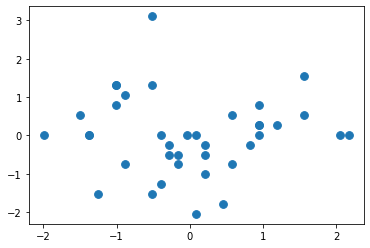

In [46]:
plt.scatter(X_scaled[:,0], X_scaled[:, 1], cmap='autumn', s=60)

In [47]:
from sklearn.cluster import KMeans

In [48]:
k_inertia = []

ks = range(2, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    k_inertia.append(clf_kmeans.inertia_)

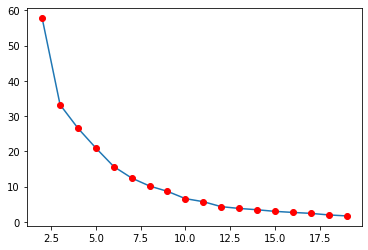

In [49]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [50]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_scaled)
clusters

array([2, 0, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1,
       0, 2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 1, 1])

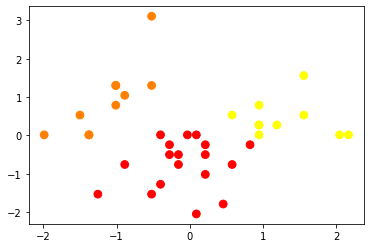

In [51]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)